<a href="https://colab.research.google.com/github/ladyjfuhrer/pi_Intern/blob/main/logregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression #it's commonly used for binary classification tasks
from sklearn.metrics import accuracy_score

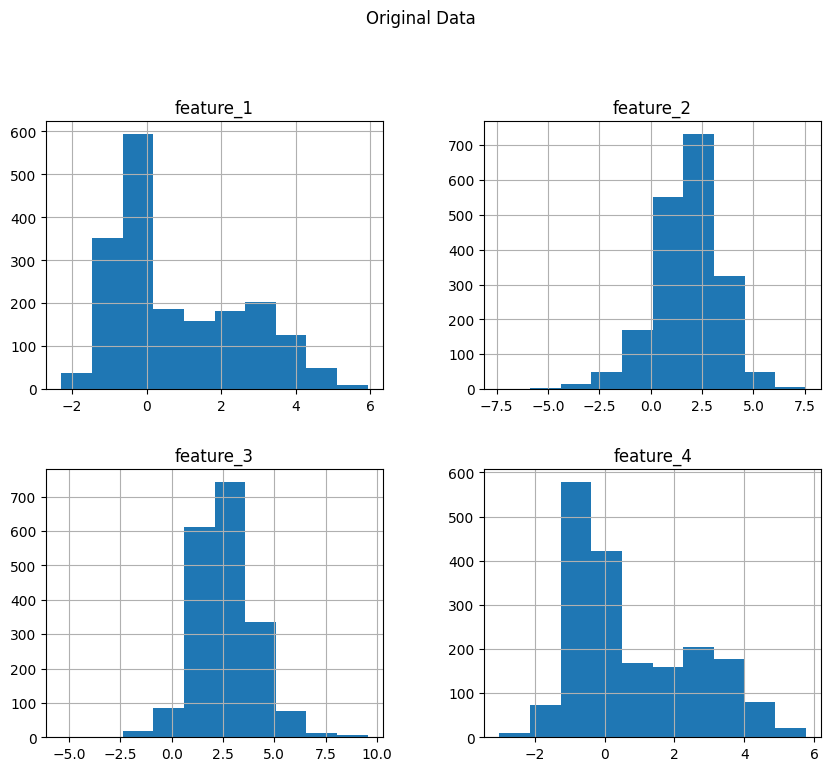

In [ ]:
# Load the dataset
data_file = pd.read_csv("/content/dataset.csv")

# Visualize the original data
data_file.hist(figsize=(10, 8))
plt.suptitle("Original Data", y=1.02)
plt.show()

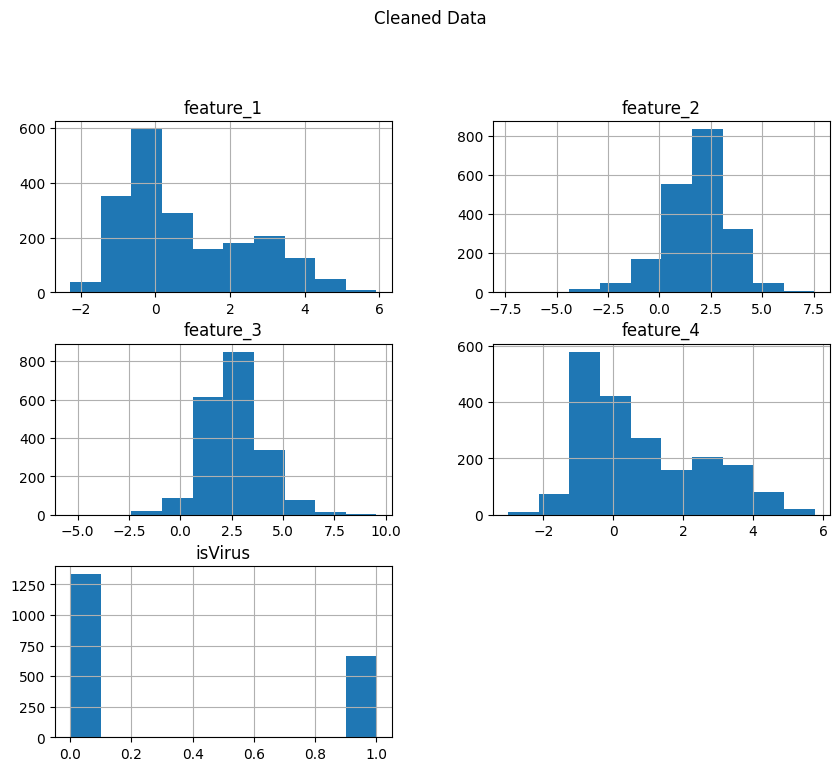

In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
cleaned_data_file = pd.DataFrame(imputer.fit_transform(data_file), columns=data_file.columns)

# Visualize the cleaned data
cleaned_data_file.hist(figsize=(10, 8))
plt.suptitle("Cleaned Data", y=1.02)
plt.show()

In [ ]:
# Split the data into features and labels
X = cleaned_data_file.drop(columns=['isVirus'])
y = data_file['isVirus']  # Use the original labels

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#I used logistic regression because it's commonly used for binary classification tasks
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

#there is no significant class imbalance mentioned in the task so i used accuracy metrik
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.645
